# Analyse pandas files

Purpose detection of bad files

work with Weakly_2023_11
- use jupyter kernel LSST
- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2023/04/04
- last update : 2023/04/04


In [1]:
import h5py

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

In [89]:
import seaborn as sns

In [23]:
import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd
pd.options.display.max_columns = None

plt.rcParams["figure.figsize"] = (8,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [4]:
from astropy.time import Time
import astropy.units as u

In [5]:
DateToRuncollection = {

 # september 2022
 20220912 :  "u/dagoret/BPS_manyspectro_v60", # Missing collection
 20220913 :  "u/dagoret/BPS_manyspectro_v61", # Missing collection
 20220914 :  "u/dagoret/BPS_manyspectro_v62", # Missing collection  
 20220927 :  "u/dagoret/BPS_manyspectro_v63", # Mount errors available, mitigé
 20220928 :  "u/dagoret/BPS_manyspectro_v64", # Mount errors available, very nice spectra
 20220929 :  "u/dagoret/BPS_manyspectro_v65", # Mount errors available, very nice spectra
      
    
 # october 2022
 20221012 :  "u/dagoret/BPS_manyspectro_v56", # mount errors , nice
 20221025 :  "u/dagoret/BPS_manyspectro_v57", # mount errors, very bad spectra
 20221026 :  "u/dagoret/BPS_manyspectro_v58", # mount errors,  nice spectra
 20221027 :  "u/dagoret/BPS_manyspectro_v59", # mount errors,  nice spectra
    
 # november 2022
 20221109 :  "u/dagoret/BPS_manyspectro_v53", # nice
 20221110 :  "u/dagoret/BPS_manyspectro_v54", # mount errors available, many bad rec spectra
 20221123 :  "u/dagoret/BPS_manyspectro_v55", # mount errors , nice   
    
 # december 2022   
 20221207 :  "u/dagoret/BPS_manyspectro_v48",
 20221208 :  "u/dagoret/BPS_manyspectro_v49",
 20221209 :  "u/dagoret/BPS_manyspectro_v50", 
 20221210 :  "u/dagoret/BPS_manyspectro_v51", 
 20221212 :  "u/dagoret/BPS_manyspectro_v52",    
    
 #January 2023
 20230117 :  "u/dagoret/BPS_manyspectro_v79", # no mount errors
 20230118 :  "u/dagoret/BPS_manyspectro_v80", # no mount
 20230119 :  "u/dagoret/BPS_manyspectro_v77", # missing for moment
 20230131 :  "u/dagoret/BPS_manyspectro_v78", # missing for moment


 # february 2023
 20230214 :  "u/dagoret/BPS_manyspectro_v42",
 20230215 :  "u/dagoret/BPS_manyspectro_v43", # mount errors
 20230216 :  "u/dagoret/BPS_manyspectro_v44", # mount errors 
 20230228 :  "u/dagoret/BPS_manyspectro_v70",   
 
 # march 2023  
 20230301 :  "u/dagoret/BPS_manyspectro_v71", 
 20230302 :  "u/dagoret/BPS_manyspectro_v72", 
 20230315 :  "u/dagoret/BPS_manyspectro_v73", 
 20230316 :  "u/dagoret/BPS_manyspectro_v74",    
    
}

In [6]:
DATE = 20230315
filterdispersername = "empty~holo4_003"

In [7]:
configmode = "PSF2DFFM_REBIN2"
specver="specV2.4"

In [8]:
input_summary_file = f"fullsummaryspectra_{DATE}-{filterdispersername}-{configmode}-{specver}-oga.csv"
input_file_h5 = f"allspectra_{DATE}-{filterdispersername}-{configmode}-{specver}-oga.hdf5"

In [9]:
input_summary_file

'fullsummaryspectra_20230315-empty~holo4_003-PSF2DFFM_REBIN2-specV2.4-oga.csv'

# Read pandas file

In [14]:
df=pd.read_csv(input_summary_file,index_col=0)

In [15]:
df

,index,exposure,spec_date_obs,spec_target_label,spec_filter_label,spec_airmass,spec_pressure,spec_temperature,spec_humidity,spec_hour_angle,spec_parallactic_angle,spec_camera_angle,spec_order,spec_header_target,spec_header_redshift,spec_header_grating,spec_header_rotangle,spec_header_d2ccd,spec_header_lshift,spec_header_parangle,spec_header_targetx,spec_header_targety,spec_header_lbda_ref,spec_header_pixshift,spec_header_psf_reg,spec_header_trace_r,spec_header_chi2_fit,spec_header_a2_fit,spec_header_am_fit,spec_header_meanfwhm,spec_header_version,spec_header_rebin,spec_header_date-obs,spec_header_exptime,spec_header_airmass,spec_header_dec,spec_header_ha,spec_header_outtemp,spec_header_outpress,spec_header_outhum,spec_header_filter,spec_header_cam_rot,spec_header_s_x0,spec_header_s_y0,spec_header_s_xmin,spec_header_s_xmax,spec_header_s_ymin,spec_header_s_ymax,spec_header_s_nx,spec_header_s_ny,spec_header_s_dec,spec_header_s_sat,spec_spectrogram_x0,spec_spectrogram_y0,spec_spectrogram_xmin,spec_spectrogram_xmax,spec_spectrogram_ymin,spec_spectrogram_ymax,spec_spectrogram_deg,spec_spectrogram_saturation,spec_spectrogram_Nx,spec_spectrogram_Ny,me_az_rms,me_el_rms,me_rot_rms,me_image_az_rms,me_image_el_rms,me_image_rot_rms
0,0,2023031500617,2023-03-16T05:11:21.499995014Z,HD185975,empty,2.080090,0,0,0,-126.194843,-127.358760,-51.775004,1,HD185975,-0.000065,holo4_003,0.524906,187.408109,0.0,-127.358760,147.302473,884.252706,597.257159,0.029404,0.347336,298.547682,10.322608,1.0,2.080090,4.306693,2.4,2,2023-03-16T05:11:21.499995014Z,30.0,2.080090,-87.429470,-126.194843,0,0,0,empty,-51.775004,-417.753982,83.252706,565,1702,801,986,1137,185,2,22666.666667,-417.753982,83.252706,565,1702,801,986,2,22666.666667,1137,185,0.017521,0.014447,0.118750,0.015378,0.014447,0.000161
1,1,2023031500618,2023-03-16T05:12:04.498004925Z,HD185975,empty,2.079669,0,0,0,-126.014674,-127.181454,-51.775288,1,HD185975,-0.000065,holo4_003,0.498560,187.306036,0.0,-127.181454,148.371488,884.997932,597.257159,0.124271,0.619798,234.722805,13.834057,1.0,2.079669,5.228513,2.4,2,2023-03-16T05:12:04.498004925Z,30.0,2.079669,-87.429464,-126.014674,0,0,0,empty,-51.775288,-416.996039,82.997932,565,1702,802,987,1137,185,2,22666.666667,-416.996039,82.997932,565,1702,802,987,2,22666.666667,1137,185,0.015482,0.028492,0.105376,0.013587,0.028492,0.000143
2,2,2023031500625,2023-03-16T05:19:03.555003211Z,HD142331,empty,1.817454,0,0,0,-56.298958,-120.715337,-59.433487,1,HD142331,-0.000236,holo4_003,0.428282,187.316312,0.0,-120.715337,152.005239,859.687341,596.970132,0.081979,1.748588,209.148635,5.101009,1.0,1.817454,5.039207,2.4,2,2023-03-16T05:19:03.555003211Z,30.0,1.817454,-8.533026,-56.298958,0,0,0,empty,-59.433487,-418.328229,84.687341,570,1706,775,960,1136,185,2,22666.666667,-418.328229,84.687341,570,1706,775,960,2,22666.666667,1136,185,0.032113,0.063058,0.134142,0.026841,0.063058,0.000182
3,3,2023031500626,2023-03-16T05:19:46.505502400Z,HD142331,empty,1.810158,0,0,0,-56.119452,-120.748417,-59.433438,1,HD142331,-0.000236,holo4_003,0.433932,187.316568,0.0,-120.748417,151.927771,858.918048,596.970132,0.126478,1.152126,218.131442,3.111382,1.0,1.810158,5.222475,2.4,2,2023-03-16T05:19:46.505502400Z,30.0,1.810158,-8.533037,-56.119452,0,0,0,empty,-59.433438,-417.412176,84.918048,569,1706,774,959,1137,185,2,22666.666667,-417.412176,84.918048,569,1706,774,959,2,22666.666667,1137,185,0.037792,0.102919,0.133464,0.031532,0.102919,0.000181
4,4,2023031500633,2023-03-16T05:23:17.260500736Z,HD146233,empty,2.021655,0,0,0,-60.564428,-120.144927,-59.885846,1,HD146233,0.000039,holo4_003,0.469873,185.885943,0.0,-120.144927,156.720068,856.295174,591.927760,-0.237063,0.252348,266.065949,115.957429,1.0,2.021655,4.851941,2.4,2,2023-03-16T05:23:17.260500736Z,30.0,2.021655,-8.324728,-60.564428,0,0,0,empty,-59.885846,-418.526325,83.295174,576,1712,773,958,1136,185,2,22666.666667,-418.526325,83.295174,576,1712,773,958,2,22666.666667,1136,185,0.033304,0.083883,0.108508,0.028971,0.083883,0.000147
...,...,...

# Control plots

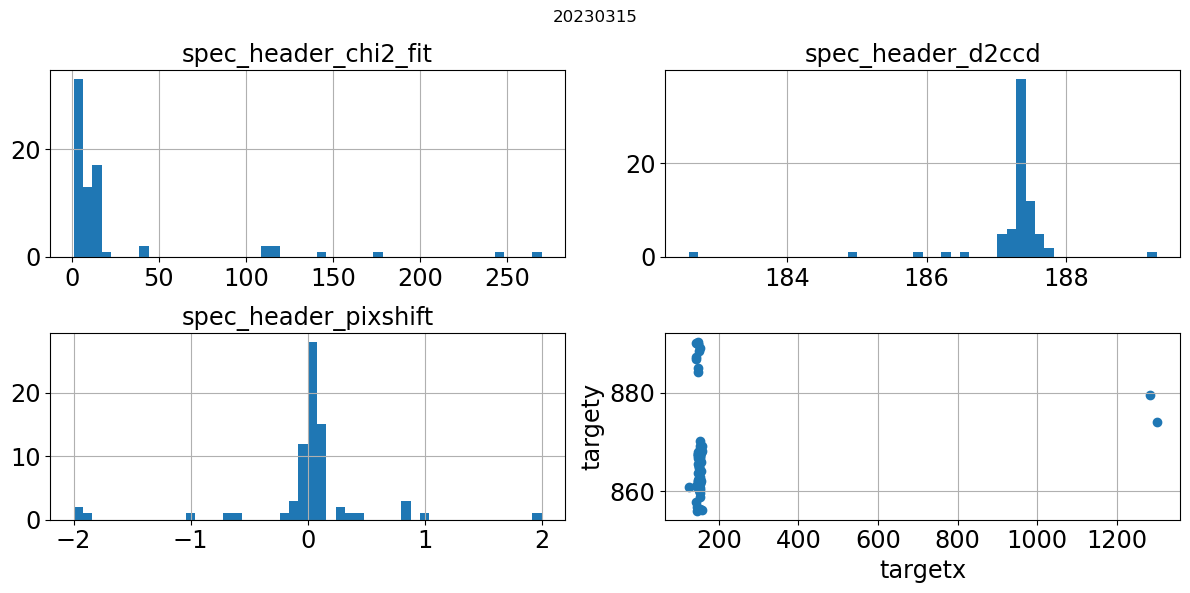

In [87]:
fig = plt.figure(figsize=(12,6))
axes = fig.subplots(2,2)
all_names = ['spec_header_chi2_fit','spec_header_d2ccd','spec_header_pixshift']

for i, ax in enumerate(axes.flat):    
    if i <=2: 
        name = all_names[i]
        nbins=50
        values = df[name].values
        ax.hist(values,bins=nbins)
        ax.set_title(name)
        ax.grid()
    if i == 3:
        xval=df["spec_header_targetx"].values
        yval=df["spec_header_targety"].values
        ax.scatter(xval,yval)
        ax.set_xlabel("targetx")
        ax.set_ylabel("targety")
        ax.grid()
plt.suptitle(DATE)
plt.tight_layout()
plt.show()    

In [100]:
df_cut1 = df[['spec_header_chi2_fit','spec_header_d2ccd','spec_header_pixshift']]
df_cut2 = df[['spec_header_targetx','spec_header_targety']]

<Figure size 1600x1600 with 0 Axes>

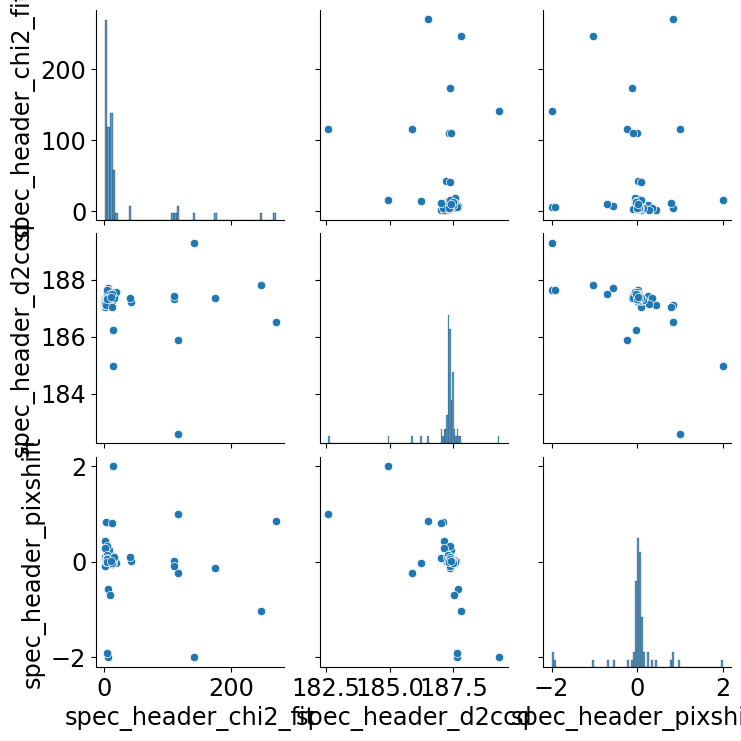

In [106]:
plt.figure(figsize=(16,16))
sns.pairplot(df_cut1)
plt.show()

<Figure size 1600x1600 with 0 Axes>

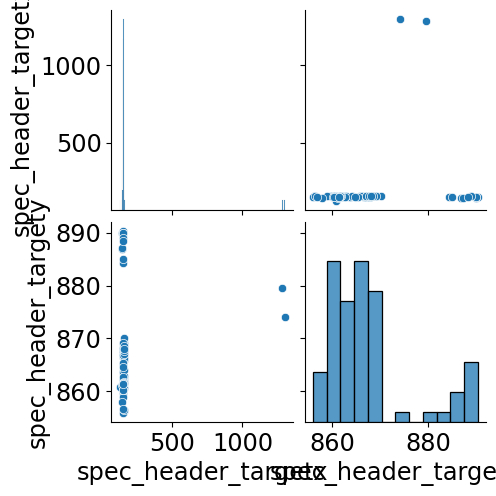

In [107]:
plt.figure(figsize=(16,16))
sns.pairplot(df_cut2)
plt.show()

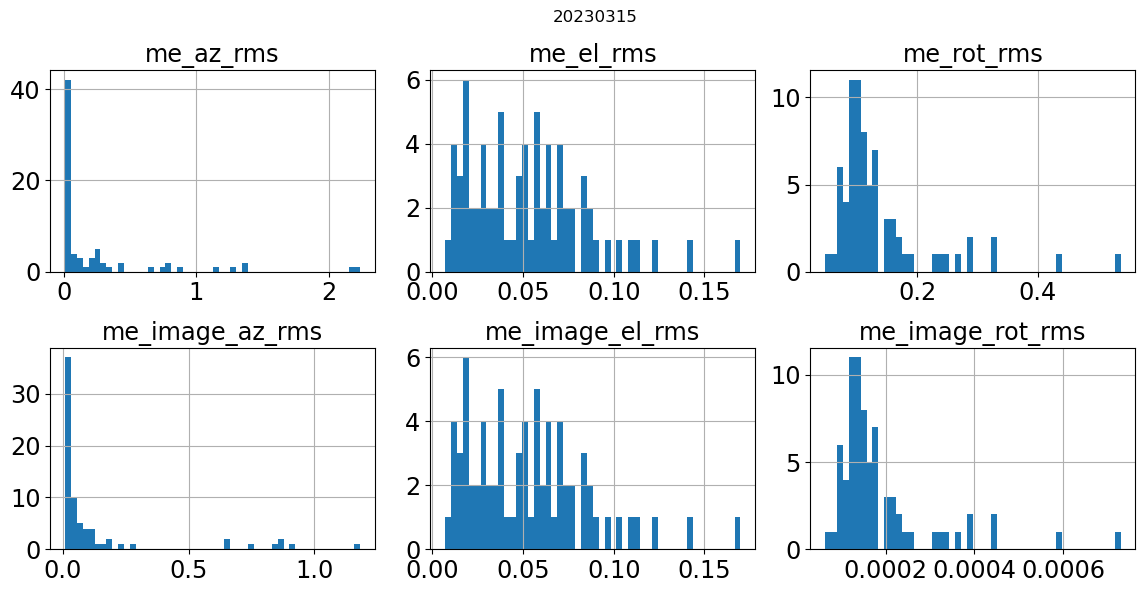

In [110]:
fig = plt.figure(figsize=(12,6))
axes = fig.subplots(2,3)
all_names = ["me_az_rms","me_el_rms","me_rot_rms","me_image_az_rms","me_image_el_rms","me_image_rot_rms"]

for i, ax in enumerate(axes.flat):    
    name = all_names[i]
    nbins=50
    values =  df[name].values
    ax.hist(values,bins=nbins)
    ax.set_title(name)
    ax.grid()
    
plt.suptitle(DATE)
plt.tight_layout()
plt.show()    

In [111]:
df_cut3 =df[all_names]

<Figure size 1600x1600 with 0 Axes>

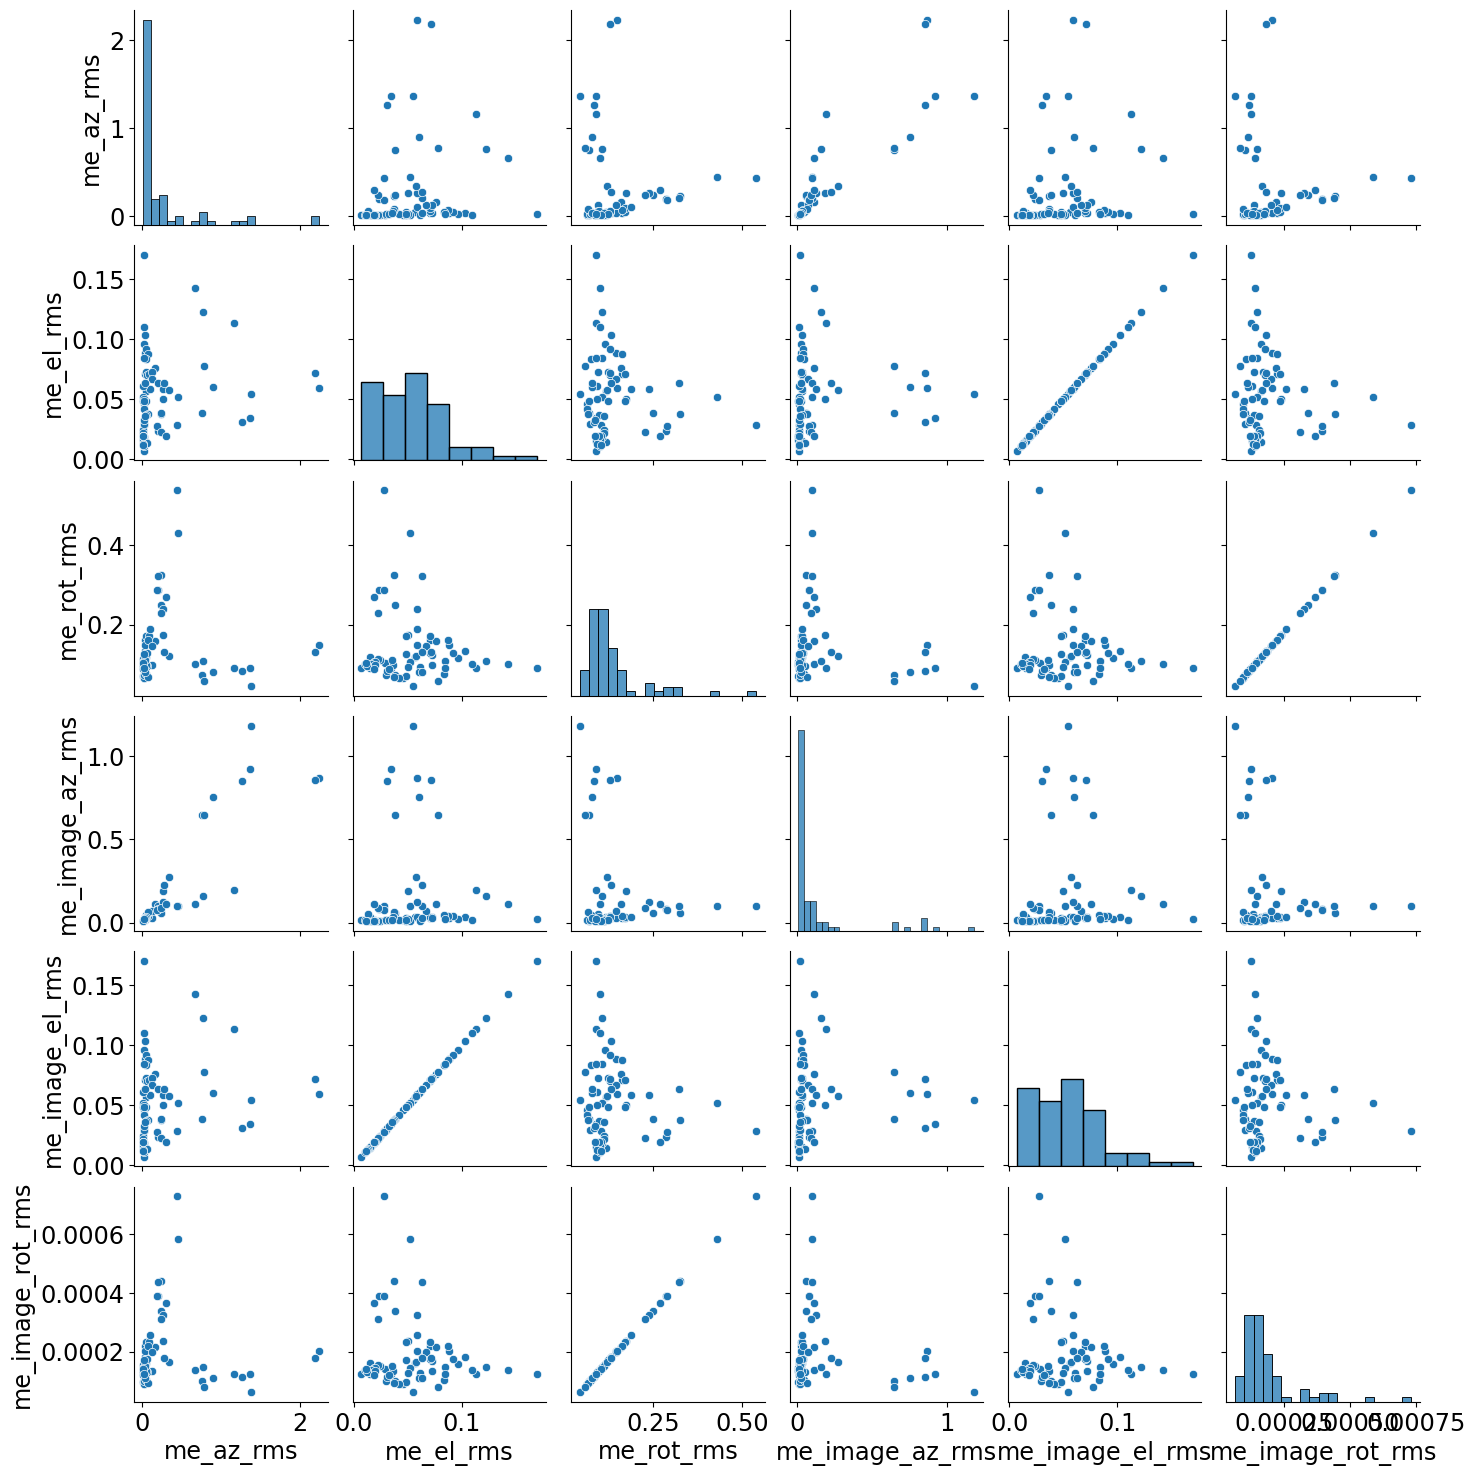

In [113]:
plt.figure(figsize=(16,16))
sns.pairplot(df_cut3)
plt.show()

# Cuts